In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
from matplotlib import rcParams

# Set font to Arial
rcParams['font.family'] = 'Arial'

# Define LeNet-5 model without dropout for color images
class SimpleLeNet5Color(nn.Module):
    def __init__(self):
        super(SimpleLeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(6 * 14 * 14, 10)  # Adjust input size based on your image dimensions

    def forward(self, x):
        x = self.conv1(x)
        conv1_output = torch.relu(x)
        x = self.pool(conv1_output)
        x = x.view(-1, 6 * 14 * 14)  # Adjust the view size based on your image dimensions
        x = self.fc1(x)
        return x, conv1_output

# List to store activations for each model
all_conv1_activations = []
all_labels = []

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

for n in range(10):
    # Load the pre-trained model
    model = SimpleLeNet5Color()
    model.load_state_dict(torch.load('model2_' + str(n) + '_9.pth'))
    model.eval()


    # Get the activations of the conv1 layer for the test set
    conv1_activations = None
    labels = None
    with torch.no_grad():
        for inputs, output_labels in dataloader:
            _, conv1_output = model(inputs)
            conv1_activations = conv1_output if conv1_activations is None else torch.cat((conv1_activations, conv1_output), 0)
            labels = output_labels if labels is None else torch.cat((labels, output_labels), 0)

    # Append activations to the list
    all_conv1_activations.append(conv1_activations.numpy())
    all_labels.append(labels.numpy())

smoothed_histograms_2_layers = all_conv1_activations
labels_2_layers = all_labels

Files already downloaded and verified


[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d


# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)

    def forward(self, x):
        x = self.conv1(x)
        conv1_output = torch.relu(x)
        x = self.pool(conv1_output)
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        return x, conv1_output

# List to store activations for each model
all_conv1_activations = []
all_labels = []

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

for n in range(10):
    # Load the pre-trained model
    model = LeNet5Color()
    model.load_state_dict(torch.load('model3_' + str(n) + '_9.pth'))
    model.eval()

    # Get the activations of the conv1 layer for the test set
    conv1_activations = None
    labels = None

    with torch.no_grad():
        for inputs, output_labels in dataloader:
            _, conv1_output = model(inputs)
            conv1_activations = conv1_output if conv1_activations is None else torch.cat((conv1_activations, conv1_output), 0)
            labels = output_labels if labels is None else torch.cat((labels, output_labels), 0)

    # Append activations to the list
    all_conv1_activations.append(conv1_activations.numpy())
    all_labels.append(labels.numpy())
    
smoothed_histograms_3_layers = all_conv1_activations
labels_3_layers = all_labels

Files already downloaded and verified


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d


# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 10)
        #self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        conv1_output = torch.relu(x)
        x = self.pool(conv1_output)
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        #x = self.fc3(x)
        return x, conv1_output

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

    # List to store activations for each model
all_conv1_activations = []
all_labels = []

for n in range(10):
    # Load the pre-trained model
    model = LeNet5Color()
    model.load_state_dict(torch.load('model4_' + str(n) + '_9.pth'))
    model.eval()


    # Get the activations of the conv1 layer for the test set
    conv1_activations = None
    labels = None

    with torch.no_grad():
        for inputs, output_labels in dataloader:
            _, conv1_output = model(inputs)
            conv1_activations = conv1_output if conv1_activations is None else torch.cat((conv1_activations, conv1_output), 0)
            labels = output_labels if labels is None else torch.cat((labels, output_labels), 0)

    # Append activations to the list
    all_conv1_activations.append(conv1_activations.numpy())
    all_labels.append(labels.numpy())

smoothed_histograms_4_layers = all_conv1_activations
labels_4_layers = all_labels

Files already downloaded and verified


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d


# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        conv1_output = torch.relu(x)
        x = self.pool(conv1_output)
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x, conv1_output

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=1000, shuffle=False)

# List to store activations for each model
all_conv1_activations = []
all_labels = []

for n in range(10):
    # Load the pre-trained model
    model = LeNet5Color()
    model.load_state_dict(torch.load('model5_' + str(n) + '_9.pth'))
    model.eval()

    # Get the activations of the conv1 layer for the test set
    conv1_activations = None
    labels = None

    with torch.no_grad():
        for inputs, output_labels in dataloader:
            _, conv1_output = model(inputs)
            conv1_activations = conv1_output if conv1_activations is None else torch.cat((conv1_activations, conv1_output), 0)
            labels = output_labels if labels is None else torch.cat((labels, output_labels), 0)

    # Append activations to the list
    all_conv1_activations.append(conv1_activations.numpy())
    all_labels.append(labels.numpy())

smoothed_histograms_5_layers = all_conv1_activations
labels_5_layers = all_labels

Files already downloaded and verified


Processing matrix 1/10
Processing matrix 2/10
Processing matrix 3/10
Processing matrix 4/10
Processing matrix 5/10
Processing matrix 6/10
Processing matrix 7/10
Processing matrix 8/10
Processing matrix 9/10
Processing matrix 10/10
Processing matrix 1/10
Processing matrix 2/10
Processing matrix 3/10
Processing matrix 4/10
Processing matrix 5/10
Processing matrix 6/10
Processing matrix 7/10
Processing matrix 8/10
Processing matrix 9/10
Processing matrix 10/10
Processing matrix 1/10
Processing matrix 2/10
Processing matrix 3/10
Processing matrix 4/10
Processing matrix 5/10
Processing matrix 6/10
Processing matrix 7/10
Processing matrix 8/10
Processing matrix 9/10
Processing matrix 10/10
Processing matrix 1/10
Processing matrix 2/10
Processing matrix 3/10
Processing matrix 4/10
Processing matrix 5/10
Processing matrix 6/10
Processing matrix 7/10
Processing matrix 8/10
Processing matrix 9/10
Processing matrix 10/10


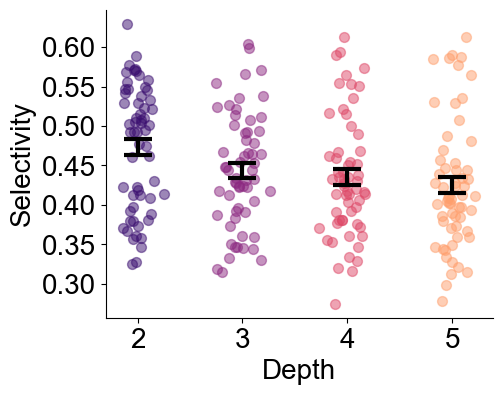

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
import seaborn as sns

rainbow = sns.color_palette("magma", 4)

fig, ax = plt.subplots(figsize=(5, 4))

def calculate_filter_selectivities(matrices, labels):
    """
    Compute filter selectivities vectorized over images and spatial locations.
    For each filter, the function computes the average activation per class 
    at each spatial location, then computes a selectivity ratio:
    
        selectivity = (preferred - avg_other) / (preferred + avg_other + 1e-5)
    
    where 'preferred' is the maximum average activation across classes 
    (which may be different at different spatial locations) and 'avg_other' 
    is the mean activation over the remaining classes. Finally, for each filter,
    the maximum selectivity (over all spatial locations) is returned.
    
    Parameters:
        matrices: list of numpy arrays with shape (N, F, H, W)
        labels: list of numpy arrays with shape (N,) of class labels
    
    Returns:
        all_ratios: a list of maximum selectivity ratios for each filter (flattened across matrices)
    """
    all_ratios = []
    num_classes = 10  # Assuming CIFAR-10
    
    for matrix_idx, (matrix, label) in enumerate(zip(matrices, labels)):
        print(f"Processing matrix {matrix_idx+1}/{len(matrices)}")
        # matrix shape: (N, F, H, W)
        N, F, H, W = matrix.shape
        
        # Create one-hot encoding for labels: shape (N, num_classes)
        one_hot = np.zeros((N, num_classes))
        one_hot[np.arange(N), label] = 1
        
        # Compute counts for each class (shape: (num_classes,))
        counts = np.sum(one_hot, axis=0)
        counts[counts == 0] = 1  # avoid division by zero
        
        # Compute sum of activations per class:
        # For each class c, we want to sum over images: matrix[i, f, h, w] * one_hot[i, c]
        # The result has shape (F, H, W, num_classes)
        sum_acts = np.tensordot(matrix, one_hot, axes=([0], [0]))
        
        # Compute average activation per class at each spatial location
        # Broadcasting divides each class-sum by its count.
        avg_acts = sum_acts / counts
        
        # For each (filter, h, w), find the maximum average activation (the "preferred" class)
        preferred = np.max(avg_acts, axis=-1)  # shape: (F, H, W)
        
        # Compute the sum over classes and then the average for the other classes
        sum_all = np.sum(avg_acts, axis=-1)  # shape: (F, H, W)
        avg_other = (sum_all - preferred) / (num_classes - 1)
        
        # Compute the selectivity ratio at each spatial location
        selectivity = (preferred - avg_other) / (preferred + avg_other + 1e-5)
        
        # For each filter, take the maximum selectivity across spatial locations
        max_selectivity = np.max(selectivity, axis=(1, 2))  # shape: (F,)
        all_ratios.extend(max_selectivity.tolist())
        
    return all_ratios

# Prepare a list of tuples for each depth group: (data, x_position, color)
depth_data = [
    (calculate_filter_selectivities(smoothed_histograms_2_layers, labels_2_layers), 2, rainbow[0]),
    (calculate_filter_selectivities(smoothed_histograms_3_layers, labels_3_layers), 3, rainbow[1]),
    (calculate_filter_selectivities(smoothed_histograms_4_layers, labels_4_layers), 4, rainbow[2]),
    (calculate_filter_selectivities(smoothed_histograms_5_layers, labels_5_layers), 5, rainbow[3]),
]

# Loop over each depth group to plot individual filter selectivities and error bars
for selectivities, depth, color in depth_data:
    selectivities = np.array(selectivities)
    # Add jitter to the x-axis positions
    jitter = 0.1 * np.random.randn(len(selectivities)) + depth
    ax.scatter(jitter, selectivities, alpha=0.5, color=color, s=50)
    
    # Compute mean and SEM for this depth group
    mean_val = np.mean(selectivities)
    sem_val = np.std(selectivities) / np.sqrt(len(selectivities))
    
    # Plot a big black error bar for the mean and SEM
    ax.errorbar(depth, mean_val, yerr=sem_val, fmt='|', markersize=6, color='black',
                ecolor='black', elinewidth=3, capsize=10, capthick=3)

ax.set_xlabel('Depth', fontname="Arial", fontsize=20)
ax.set_ylabel('Selectivity', fontname="Arial", fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(range(2, 6))

# Set font properties for tick labels
for tick in ax.get_xticklabels():
    tick.set_fontname("arial")
    tick.set_fontsize(20)
for tick in ax.get_yticklabels():
    tick.set_fontname("arial")
    tick.set_fontsize(20)

plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, f_oneway, ttest_ind
import pandas as pd

# Calculate kurtosis for each layer
kurtosis_2_layers = calculate_filter_selectivities(smoothed_histograms_2_layers, labels_2_layers)
kurtosis_3_layers = calculate_filter_selectivities(smoothed_histograms_3_layers, labels_3_layers)
kurtosis_4_layers = calculate_filter_selectivities(smoothed_histograms_4_layers, labels_4_layers)
kurtosis_5_layers = calculate_filter_selectivities(smoothed_histograms_5_layers, labels_5_layers)

# Perform ANOVA
anova_result = f_oneway(kurtosis_2_layers, kurtosis_3_layers, kurtosis_4_layers, kurtosis_5_layers)

# Degrees of freedom for ANOVA
k = 4  # number of groups
n_total = (
    len(kurtosis_2_layers) +
    len(kurtosis_3_layers) +
    len(kurtosis_4_layers) +
    len(kurtosis_5_layers)
)
df_between = k - 1
df_within = n_total - k

print(f'ANOVA result: F({df_between}, {df_within}) = {anova_result.statistic:.4f}, p = {anova_result.pvalue:.4e}')

# Perform pairwise t-tests with Bonferroni correction
comparisons = [
    ("2 vs 3", kurtosis_2_layers, kurtosis_3_layers),
    ("2 vs 4", kurtosis_2_layers, kurtosis_4_layers),
    ("2 vs 5", kurtosis_2_layers, kurtosis_5_layers),
]

for label, group1, group2 in comparisons:
    t_stat, p_val = ttest_ind(group1, group2)
    p_val_corrected = p_val * len(comparisons)
    df_t = len(group1) + len(group2) - 2
    print(f'T-test {label}: t({df_t}) = {t_stat:.4f}, p (Bonferroni corrected) = {p_val_corrected:.4e}')

Processing matrix 1/10
Processing matrix 2/10
Processing matrix 3/10
Processing matrix 4/10
Processing matrix 5/10
Processing matrix 6/10
Processing matrix 7/10
Processing matrix 8/10
Processing matrix 9/10
Processing matrix 10/10
Processing matrix 1/10
Processing matrix 2/10
Processing matrix 3/10
Processing matrix 4/10
Processing matrix 5/10
Processing matrix 6/10
Processing matrix 7/10
Processing matrix 8/10
Processing matrix 9/10
Processing matrix 10/10
Processing matrix 1/10
Processing matrix 2/10
Processing matrix 3/10
Processing matrix 4/10
Processing matrix 5/10
Processing matrix 6/10
Processing matrix 7/10
Processing matrix 8/10
Processing matrix 9/10
Processing matrix 10/10
Processing matrix 1/10
Processing matrix 2/10
Processing matrix 3/10
Processing matrix 4/10
Processing matrix 5/10
Processing matrix 6/10
Processing matrix 7/10
Processing matrix 8/10
Processing matrix 9/10
Processing matrix 10/10
ANOVA result: F(3, 236) = 4.4583, p = 4.5573e-03
T-test 2 vs 3: t(118) = 2.1

Files already downloaded and verified
Most selective filter index: 2
Model with most selective filter: 2


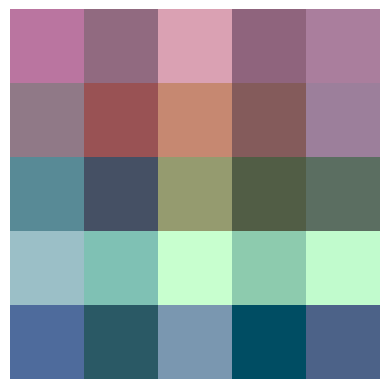

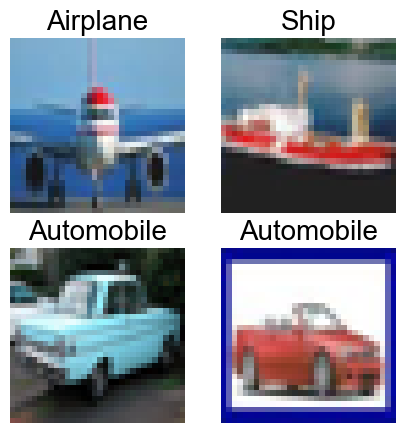

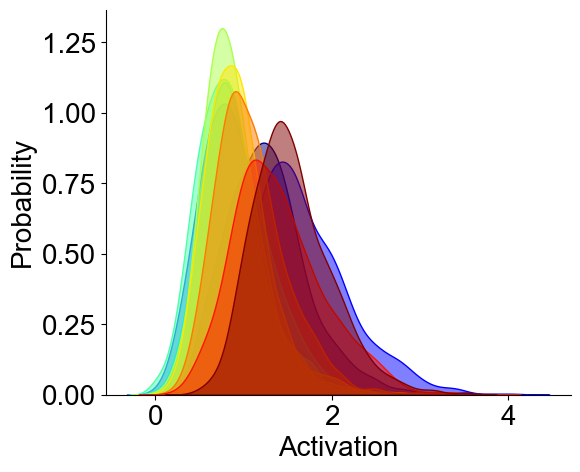

In [7]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define LeNet-5 model without dropout for color images
class SimpleLeNet5Color(nn.Module):
    def __init__(self):
        super(SimpleLeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(6 * 14 * 14, 10)  # Adjust input size based on your image dimensions

    def forward(self, x):
        x = self.conv1(x)
        conv1_output = torch.relu(x)
        x = self.pool(conv1_output)
        x = x.view(-1, 6 * 14 * 14)  # Adjust the view size based on your image dimensions
        x = self.fc1(x)
        return x, conv1_output

# Function to calculate preferred class ratios
def calculate_preferred_class_ratios(matrices, labels):
    all_ratios = []
    num_classes = 10
    for matrix, label in zip(matrices, labels):
        matrix_ratios = []
        num_filters = matrix.shape[1]
        for filter_index in range(num_filters):
            filter_activations = matrix[:, filter_index, :, :]
            max_values = np.max(filter_activations, axis=(1, 2))
            class_max_values = [[] for _ in range(num_classes)]
            for max_val, lbl in zip(max_values, label):
                class_max_values[lbl].append(max_val)
            avg_max_activations = np.array([np.mean(acts) for acts in class_max_values])
            preferred_class = np.argmax(avg_max_activations)
            avg_max_preferred_class = avg_max_activations[preferred_class]
            remaining_classes_avg_max = np.mean(np.delete(avg_max_activations, preferred_class))
            ratio = avg_max_preferred_class / (remaining_classes_avg_max + 1e-5)
            matrix_ratios.append(ratio)
        all_ratios.append(matrix_ratios)
    return all_ratios

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

# List to store activations for each model
all_conv1_activations = []
all_labels = []
all_model_indices = []

for n in range(10):
    # Load the pre-trained model
    model = SimpleLeNet5Color()
    model.load_state_dict(torch.load('model2_' + str(n) + '_9.pth'))
    model.eval()

    # Get the activations of the conv1 layer for the test set
    conv1_activations = None
    labels = None
    with torch.no_grad():
        for inputs, output_labels in dataloader:
            _, conv1_output = model(inputs)
            conv1_activations = conv1_output if conv1_activations is None else torch.cat((conv1_activations, conv1_output), 0)
            labels = output_labels if labels is None else torch.cat((labels, output_labels), 0)

    # Append activations and model index to the lists
    all_conv1_activations.append(conv1_activations.numpy())
    all_labels.append(labels.numpy())
    all_model_indices.append(n)

# Calculate the preferred class ratios for each filter
all_ratios = calculate_preferred_class_ratios(all_conv1_activations, all_labels)

# Find the second most selective filter across all models
all_ratios = np.array(all_ratios)
flattened_ratios = all_ratios.flatten()
sorted_indices = np.argsort(flattened_ratios)

# Get the index of the second most selective filter
second_most_selective_index = sorted_indices[-1]

# Get the model and filter index from the flattened index
most_selective_model_index, most_selective_filter_index = np.unravel_index(second_most_selective_index, all_ratios.shape)

print(f"Most selective filter index: {most_selective_filter_index}")
print(f"Model with most selective filter: {most_selective_model_index}")

# Load the model with the most selective filter
model = SimpleLeNet5Color()
model.load_state_dict(torch.load(f'model2_{most_selective_model_index}_9.pth'))

# Visualize the filter itself
conv1_weights = model.conv1.weight.data.numpy()
most_selective_filter = conv1_weights[most_selective_filter_index]

# Normalize the filter for better visualization
most_selective_filter = (most_selective_filter - most_selective_filter.min()) / (most_selective_filter.max() - most_selective_filter.min())

plt.imshow(np.transpose(most_selective_filter, (1, 2, 0)))
#plt.title(f'Most Selective Filter (Index {most_selective_filter_index})')
plt.axis('off')
plt.show()

# Find the images with the maximum activation for the second most selective filter
max_activations = []
all_inputs = []
all_labels = []

for inputs, labels in dataloader:
    with torch.no_grad():
        _, conv1_output = model(inputs)
    filter_activations = conv1_output[:, most_selective_filter_index, :, :].numpy()
    max_activation = np.max(filter_activations, axis=(1, 2))
    max_activations.extend(max_activation)
    all_inputs.extend(inputs.numpy())
    all_labels.extend(labels.numpy())

# Get the indices of the top 5 images with the highest activations
top_indices = np.argsort(max_activations)[-5:]

cifar10_labels = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]

# Get the indices of the top 4 images with the highest activations
top_indices = np.argsort(max_activations)[-4:]

# Visualize the images with the highest activations for the second most selective filter
fig, axes = plt.subplots(2, 2, figsize=(5, 5))
axes = axes.ravel()

for ax, idx in zip(axes, top_indices):
    ax.imshow(np.transpose((all_inputs[idx] * 0.5 + 0.5), (1, 2, 0)))
    ax.set_title(f"{cifar10_labels[all_labels[idx]]}", fontsize = 20)
    ax.axis('off')

#plt.suptitle(f"Images activating the second most selective filter (Index {most_selective_filter_index})")
plt.show()

# Calculate activations for each class
class_activations = [[] for _ in range(10)]

for inputs, labels in dataloader:
    with torch.no_grad():
        _, conv1_output = model(inputs)
    filter_activations = conv1_output[:, most_selective_filter_index, :, :].numpy()
    max_activation = np.max(filter_activations, axis=(1, 2))
    for activation, label in zip(max_activation, labels):
        class_activations[label].append(activation)

# Plot the distribution of activations for each class
colors = plt.cm.jet(np.linspace(0, 1, 10))
plt.figure(figsize=(6, 5))


for i, acts in enumerate(class_activations):
    sns.kdeplot(acts, fill=True, color=colors[i], alpha=0.5, label=f'Class {i}')

plt.xlabel('Activation', fontsize=20)
plt.ylabel('Probability', fontsize=20)
#plt.title('Feature activations', fontsize=16)

ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make tick labels larger
ax.tick_params(axis='both', which='major', labelsize=20)

plt.show()


Files already downloaded and verified
16
Most selective filter index: 1
Model with most selective filter: 1


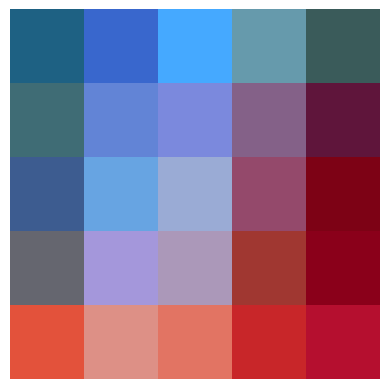

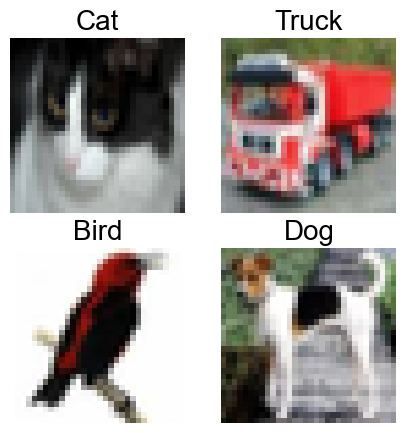

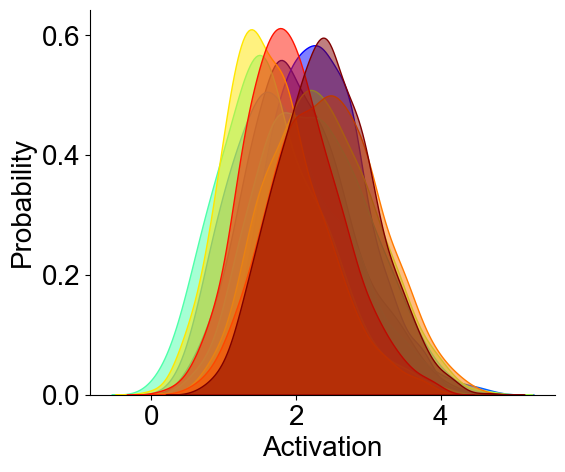

In [8]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        conv1_output = torch.relu(x)
        x = self.pool(conv1_output)
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x, conv1_output
    
# Function to calculate preferred class ratios
def calculate_preferred_class_ratios(matrices, labels):
    all_ratios = []
    num_classes = 10
    for matrix, label in zip(matrices, labels):
        matrix_ratios = []
        num_filters = matrix.shape[1]
        for filter_index in range(num_filters):
            filter_activations = matrix[:, filter_index, :, :]
            max_values = np.max(filter_activations, axis=(1, 2))
            class_max_values = [[] for _ in range(num_classes)]
            for max_val, lbl in zip(max_values, label):
                class_max_values[lbl].append(max_val)
            avg_max_activations = np.array([np.mean(acts) for acts in class_max_values])
            preferred_class = np.argmax(avg_max_activations)
            avg_max_preferred_class = avg_max_activations[preferred_class]
            remaining_classes_avg_max = np.mean(np.delete(avg_max_activations, preferred_class))
            ratio = avg_max_preferred_class / (remaining_classes_avg_max + 1e-5)
            matrix_ratios.append(ratio)
        all_ratios.append(matrix_ratios)
    return all_ratios

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

# List to store activations for each model
all_conv1_activations = []
all_labels = []
all_model_indices = []

for n in range(10):
    # Load the pre-trained model
    model = LeNet5Color()
    model.load_state_dict(torch.load('model5_' + str(n) + '_9.pth'))
    model.eval()

    # Get the activations of the conv1 layer for the test set
    conv1_activations = None
    labels = None
    with torch.no_grad():
        for inputs, output_labels in dataloader:
            _, conv1_output = model(inputs)
            conv1_activations = conv1_output if conv1_activations is None else torch.cat((conv1_activations, conv1_output), 0)
            labels = output_labels if labels is None else torch.cat((labels, output_labels), 0)

    # Append activations and model index to the lists
    all_conv1_activations.append(conv1_activations.numpy())
    all_labels.append(labels.numpy())
    all_model_indices.append(n)


    # Calculate the preferred class ratios for each filter
all_ratios = calculate_preferred_class_ratios(all_conv1_activations, all_labels)

# Find the second most selective filter across all models
all_ratios = np.array(all_ratios)
flattened_ratios = all_ratios.flatten()
sorted_indices = np.argsort(flattened_ratios)

for x in [16]:
    
    print(x)


    # Get the index of the second most selective filter
    second_most_selective_index = sorted_indices[x]

    # Get the model and filter index from the flattened index
    most_selective_model_index, most_selective_filter_index = np.unravel_index(second_most_selective_index, all_ratios.shape)

    print(f"Most selective filter index: {most_selective_filter_index}")
    print(f"Model with most selective filter: {most_selective_model_index}")

    # Load the model with the most selective filter
    model = LeNet5Color()
    model.load_state_dict(torch.load(f'model5_{most_selective_model_index}_9.pth'))

    # Visualize the filter itself
    conv1_weights = model.conv1.weight.data.numpy()
    most_selective_filter = conv1_weights[most_selective_filter_index]

    # Normalize the filter for better visualization
    most_selective_filter = (most_selective_filter - most_selective_filter.min()) / (most_selective_filter.max() - most_selective_filter.min())

    plt.imshow(np.transpose(most_selective_filter, (1, 2, 0)))
    #plt.title(f'Most Selective Filter (Index {most_selective_filter_index})')
    plt.axis('off')
    plt.show()

    # Find the images with the maximum activation for the second most selective filter
    max_activations = []
    all_inputs = []
    all_labels = []

    for inputs, labels in dataloader:
        with torch.no_grad():
            _, conv1_output = model(inputs)
        filter_activations = conv1_output[:, most_selective_filter_index, :, :].numpy()
        max_activation = np.max(filter_activations, axis=(1, 2))
        max_activations.extend(max_activation)
        all_inputs.extend(inputs.numpy())
        all_labels.extend(labels.numpy())

    # Get the indices of the top 4 images with the highest activations
    top_indices = np.argsort(max_activations)[-4:]

    # Visualize the images with the highest activations for the second most selective filter
    fig, axes = plt.subplots(2, 2, figsize=(5, 5))
    axes = axes.ravel()

    for ax, idx in zip(axes, top_indices):
        ax.imshow(np.transpose((all_inputs[idx] * 0.5 + 0.5), (1, 2, 0)))
        ax.set_title(f"{cifar10_labels[all_labels[idx]]}", fontsize = 20)
        ax.axis('off')

    #plt.suptitle(f"Images activating the second most selective filter (Index {most_selective_filter_index})")
    plt.show()

    # Calculate activations for each class
    class_activations = [[] for _ in range(10)]

    for inputs, labels in dataloader:
        with torch.no_grad():
            _, conv1_output = model(inputs)
        filter_activations = conv1_output[:, most_selective_filter_index, :, :].numpy()
        max_activation = np.max(filter_activations, axis=(1, 2))
        for activation, label in zip(max_activation, labels):
            class_activations[label].append(activation)

    # Plot the distribution of activations for each class
    colors = plt.cm.jet(np.linspace(0, 1, 10))

    plt.figure(figsize=(6, 5))

    for i, acts in enumerate(class_activations):
        sns.kdeplot(acts, fill=True, color=colors[i], alpha=0.5, label=f'Class {i}')

    plt.xlabel('Activation', fontsize=20)
    plt.ylabel('Probability', fontsize=20)
    #plt.title('Feature activations', fontsize=20)

    ax = plt.gca()  # Get current axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Make tick labels larger
    ax.tick_params(axis='both', which='major', labelsize=20)

    plt.show()